In [5]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import re
import urllib.request as url
import re
from selenium import webdriver

### Extract list of defaulted company

In [9]:
driver = webdriver.Chrome('chromedriver') 
#html_page = url.urlopen("https://www.fscs.org.uk/what-we-cover/search-for-companies-in-default/")
driver.get("https://www.fscs.org.uk/what-we-cover/search-for-companies-in-default/")
driver.find_element_by_id("companySearch").click()
driver.find_element_by_id("companySearch").clear()
driver.find_element_by_id("companySearch").send_keys(" ")
driver.find_element_by_id("btnCompanySearch").click()
html = driver.page_source
soup = BeautifulSoup(html)

C:\Users\raffa\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\raffa\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [40]:
defaulted_df

,name,default_year
0,1 Step Mortgages Limited t/a Crocodile Loans,2011
1,1 Stop Financial Services,2014
2,1st Direct Finance Limited trading as 1st Dire...,2015
3,1st Ethical Limited,2017
4,1st Gear Finance Limited,2011
5,1st Stop Finance Limited,2010
6,2.C.I. Financial Services Limited,2006
7,20Twenty Independent Limited (T/A various names),2014
8,21st Century Finance Limited,2010
9,21st Direct Limited,2010


### Filter last 3 year

In [42]:
df=defaulted_df[defaulted_df.default_year>2014]

### Extract Management from available companies

In [73]:
driver = webdriver.Chrome('chromedriver') 
#html_page = url.urlopen("https://www.fscs.org.uk/what-we-cover/search-for-companies-in-default/")
company_found=[]
company_code=[]
for i in range(df.shape[0]):
    driver.get("https://beta.companieshouse.gov.uk/company/")
    driver.find_element_by_id("site-search-text").click()
    driver.find_element_by_id("site-search-text").clear()
    driver.find_element_by_id("site-search-text").send_keys(df.name.iloc[i])
    driver.find_element_by_id("search-submit").click()
    html = driver.page_source
    soup = BeautifulSoup(html)
    search=soup.findAll("p",{'class':'meta crumbtrail'})
    if search!=[]:
        if search[0].text.find("Dissolved") >=0:
            code=search[0].text[1:int(search[0].text.find("-"))-1]
            company_found.append(df.name.iloc[i])
            company_code.append(code)


C:\Users\raffa\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\raffa\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [134]:
columns=['id','name','creation_year','company_type']
defaulted_info_df = pd.DataFrame( columns=columns)
columns=['id','name', 'company', 'role']
officers_df = pd.DataFrame( columns=columns)
for i,code in enumerate(company_code):
    driver.get("https://beta.companieshouse.gov.uk/company/"+str(code))
    html = driver.page_source
    soup = BeautifulSoup(html)
    company_type=soup.findAll("dd",{'id':'company-type'})
    company_creation_date=soup.findAll("dd",{'id':'company-creation-date'})
    defaulted_info_df=defaulted_info_df.append({'id':code,'name':company_found[i],'creation_year':int(company_creation_date[0].text[-4:]),"company_type":company_type[0].text.replace("\n","").replace("  ","")}, ignore_index=True)
    driver.get("https://beta.companieshouse.gov.uk/company/"+str(code)+"/officers")
    html = driver.page_source
    soup = BeautifulSoup(html)
    officers=soup.findAll("span",id=lambda value: value and value.startswith("officer-name"))
    roles=soup.findAll("dd",id=lambda value: value and value.startswith("officer-role"))
    ids=soup.findAll("a",href=lambda value: value and value.startswith("/officers/"))
    for j,officer in enumerate(officers):
        officers_df=officers_df.append({'id':ids[j]['href'][10:-13],'name':officer.text.replace("\n",""),'company':company_found[i], 'role':roles[j].text.replace("\n","").replace("  ","")}, ignore_index=True)
        


C:\Users\raffa\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\raffa\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


### Extracting for each Manager the company which they work for and see if is active or not 

In [202]:
columns=['id','company_name', 'company_id', 'status', 'role']
df2 = pd.DataFrame( columns=columns)
for j, id in enumerate(officers_df.id.drop_duplicates()):
    print(j)
    driver.get("https://beta.companieshouse.gov.uk/officers/"+ id +"/appointments")
    html = driver.page_source
    soup = BeautifulSoup(html)
    c=soup.findAll("a",href=lambda value: value and value.startswith("/company/"))
    status=soup.findAll("dd",id=lambda value: value and value.startswith("company-status-"))
    occupation=soup.findAll("dd",id=lambda value: value and value.startswith("appointment-type-"))
    for i,comp in enumerate(c):
       # print(id)
       # print(comp.text[:-11])
       # print(comp.text[-9:-1])
       # print(status[i].text.replace("  ","").replace("\n",""))
       # print(occupation[i].text.replace("\n","").replace("  ",""))
        df2=df2.append({'id':id,'company_name':comp.text[:-11],'company_id':comp.text[-9:-1] ,'status':status[i].text.replace("  ","").replace("\n","") ,'role':occupation[i].text.replace("\n","").replace("  ","")}, ignore_index=True)


0


C:\Users\raffa\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\raffa\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [203]:
df2

,id,company_name,company_id,status,role
0,wiqZl7s5WbkDR5KvHCHm7dKrvKw,ESCAPE ROOMS CARDIFF LTD,09720344,Active,Director
1,wiqZl7s5WbkDR5KvHCHm7dKrvKw,CHARLES FRANK FINANCE LIMITED,07791769,Active,Director
2,wiqZl7s5WbkDR5KvHCHm7dKrvKw,CHARLES FRANK CLAIMS LIMITED,07804892,Dissolved,Director
3,wiqZl7s5WbkDR5KvHCHm7dKrvKw,1ST DIRECT FINANCE LIMITED,05863054,Dissolved,Director
4,wiqZl7s5WbkDR5KvHCHm7dKrvKw,1ST DIRECT FINANCE LIMITED,05863054,Dissolved,Secretary
5,wiqZl7s5WbkDR5KvHCHm7dKrvKw,CHARLES FRANK FINANCE LIMITED,07791769,Active,Director
6,wiqZl7s5WbkDR5KvHCHm7dKrvKw,DEBT MANAGERS STANDARDS ASSOCIATION LIMITED,04031983,Active,Director
7,wiqZl7s5WbkDR5KvHCHm7dKrvKw,LOAN MANAGEMENT SERVICES LIMITED,04571036,Dissolved,Director
8,wiqZl7s5WbkDR5KvHCHm7dKrvKw,LOAN MANAGEMENT SERVICES LIMITED,04571036,Dissolved,Secretary
9,TE7LWqFW7_mvjpMv4-2A8BD2zgI,SOUTH WALES ROOFING LTD,10284009,Active,Director


In [205]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [209]:
df3=df2[["id","company_id","status"]].merge(df2[["id","company_id","status"]], on="id")
df3=df3[df3.company_id_x!=df3.company_id_y].drop_duplicates()

### I create a network map of the companies.
### Each dot is a company( red in default , green still active) and each edge represent a shared management.
### So for example two company that shared at least a manager will be connected by an edge, then cluster with predominance of red dot means bad management team

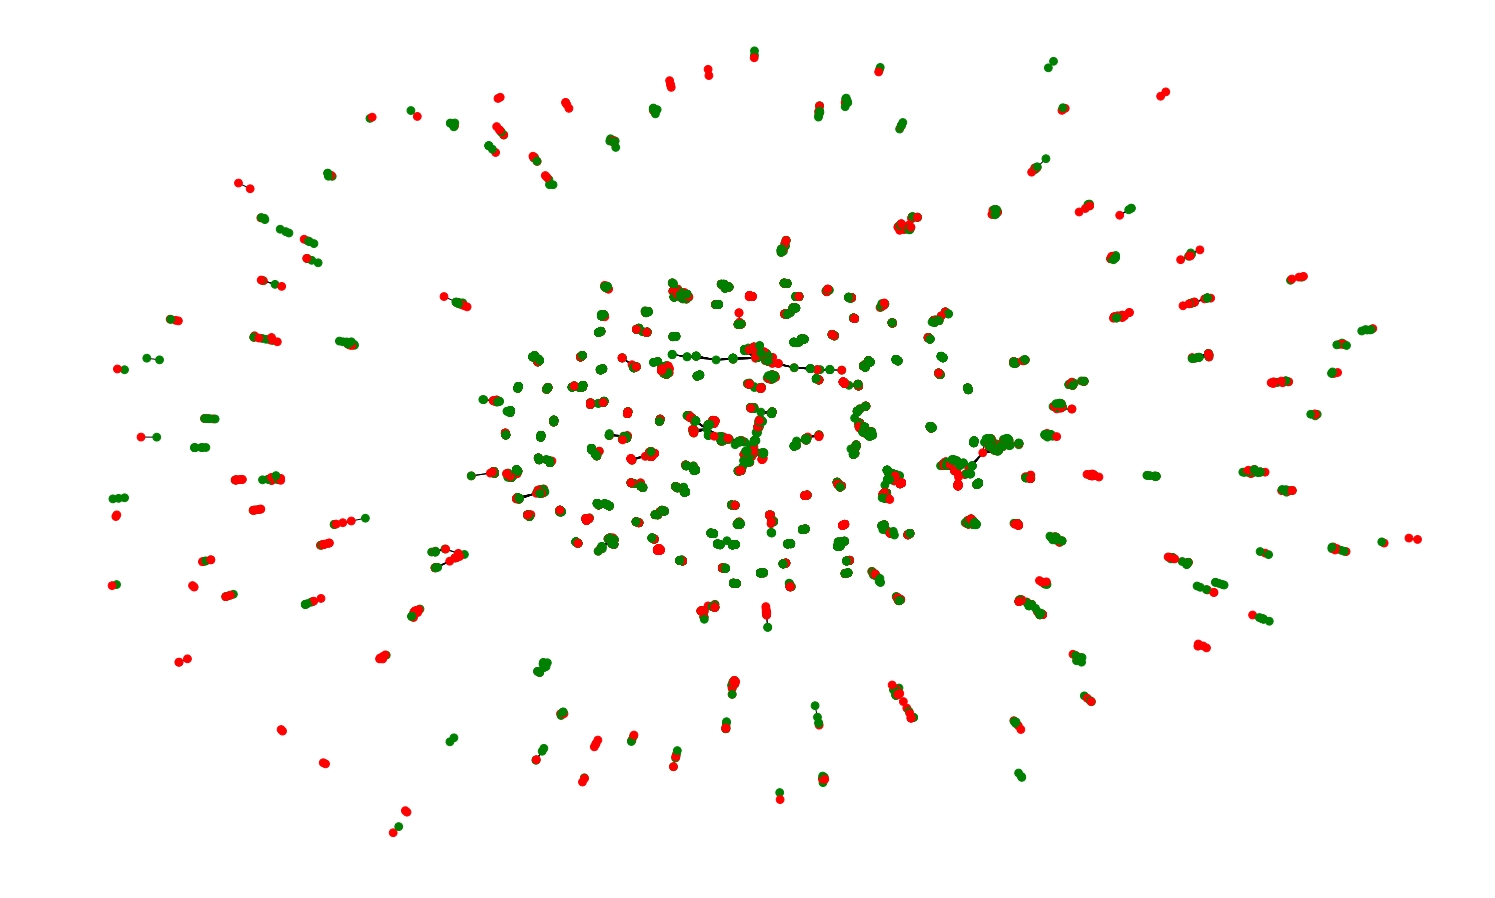

In [253]:

g=nx.Graph()
color_map = []
for n in range(df3.company_id_x.drop_duplicates().shape[0]):
    g.add_node(df3.company_id_x.drop_duplicates().iloc[n])
    if df3[["company_id_x", "status_x"]].drop_duplicates().status_x.iloc[n]=="Active":
        color_map.append('green')
    else:
        color_map.append('red')

for e in range(df3.shape[0]):
    g.add_edge(df3.company_id_x.iloc[e],df3.company_id_y.iloc[e])
plt.figure(3,figsize=(20,12)) 
nx.draw(g,node_size =60, node_color=color_map)
plt.show()